https://www.kaggle.com/code/prashant111/random-forest-classifier-feature-importance

Te prediction task is to determine whether a person makes over 50K a year. 

Random Forest classifier to predict whether a person makes over 50K a year.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('income_evaluation.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### fnlwgt: 

final weight. In other words, this is the number of people the census believes
the entry represents..

○ Integer greater than 0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data.shape

(32561, 15)

In [6]:
data.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

##### trimming col_names which have extra spaces

In [7]:
col_names = data.columns.str.replace(' ','')
col_names = col_names.str.replace('-','_')
col_names

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [8]:
data.columns = col_names
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [10]:
data['education_num'] = data['education_num'].astype('category')
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
for i in data.columns:
    if data[i].dtype != 'int64':
        print(i)
        print(data[i].value_counts())
        
        

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
education_num
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64
marital_status
 Married-civ-spouse       14976
 Never-married        

In [12]:
for i in data.columns:
    if data[i].dtype != 'int64':
        print(i)
        print(data[i].nunique())

workclass
9
education
16
education_num
16
marital_status
7
occupation
15
relationship
6
race
5
sex
2
native_country
42
income
2


##### There are 9 categorical column and 6 numerical column

In [13]:
data.isnull().sum().sum()

0

##### No missing values

In [14]:
data.describe()

,age,fnlwgt,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


#### For categorical columns

In [16]:
data.describe(include=['object']).T

,count,unique,top,freq
workclass,32561,9,Private,22696
education,32561,16,HS-grad,10501
marital_status,32561,7,Married-civ-spouse,14976
occupation,32561,15,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native_country,32561,42,United-States,29170
income,32561,2,<=50K,24720


##### Groupby

In [17]:
data.groupby(['education','workclass','income'])['income'].count().unstack().fillna(0)

income                            <=50K   >50K
education     workclass                       
 10th          ?                   98.0    2.0
               Federal-gov          6.0    0.0
               Local-gov           30.0    1.0
               Never-worked         2.0    0.0
               Private            648.0   47.0
...                                 ...    ...
 Some-college  Private           4171.0  923.0
               Self-emp-inc       110.0  116.0
               Self-emp-not-inc   379.0  107.0
               State-gov          294.0   31.0
               Without-pay          3.0    0.0

[117 rows x 2 columns]

In [18]:
pd.crosstab(data['workclass'], data['income'], margins=True, margins_name="Total")

income,<=50K,>50K,Total
workclass,,,
?,1645,191,1836
Federal-gov,589,371,960
Local-gov,1476,617,2093
Never-worked,7,0,7
Private,17733,4963,22696
Self-emp-inc,494,622,1116
Self-emp-not-inc,1817,724,2541
State-gov,945,353,1298
Without-pay,14,0,14


In [19]:
pd.crosstab(data['workclass'], data['education'], values=data['income'], aggfunc='count',margins_name="Total").round(0)

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
workclass,,,,,,,,,,,,,,,,
?,100.0,118.0,40.0,12.0,30.0,72.0,51.0,47.0,61.0,173.0,15.0,532.0,48.0,5.0,18.0,514.0
Federal-gov,6.0,9.0,5.0,NaN,1.0,2.0,3.0,55.0,38.0,212.0,16.0,263.0,67.0,NaN,29.0,254.0
Local-gov,31.0,36.0,19.0,4.0,9.0,28.0,23.0,88.0,86.0,477.0,27.0,503.0,342.0,4.0,29.0,387.0
Never-worked,2.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0
Private,695.0,923.0,333.0,136.0,266.0,424.0,387.0,729.0,1005.0,3551.0,181.0,7780.0,894.0,41.0,257.0,5094.0
Self-emp-inc,19.0,14.0,7.0,2.0,4.0,14.0,10.0,35.0,38.0,273.0,35.0,279.0,79.0,NaN,81.0,226.0
Self-emp-not-inc,67.0,60.0,19.0,13.0,19.0,94.0,34.0,71.0,108.0,399.0,50.0,866.0,124.0,NaN,131.0,486.0
State-gov,13.0,14.0,10.0,1.0,4.0,10.0,6.0,41.0,46.0,270.0,89.0,268.0,169.0,1.0,31.0,325.0
Without-pay,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,9.0,NaN,NaN,NaN,3.0


In [20]:
for i in data.columns:
    if data[i].dtype != 'int64':
        display(data.groupby([i,'income'])['income'].count().unstack().fillna(0))

income,<=50K,>50K
workclass,,
?,1645.0,191.0
Federal-gov,589.0,371.0
Local-gov,1476.0,617.0
Never-worked,7.0,0.0
Private,17733.0,4963.0
Self-emp-inc,494.0,622.0
Self-emp-not-inc,1817.0,724.0
State-gov,945.0,353.0
Without-pay,14.0,0.0


income,<=50K,>50K
education,,
10th,871.0,62.0
11th,1115.0,60.0
12th,400.0,33.0
1st-4th,162.0,6.0
5th-6th,317.0,16.0
7th-8th,606.0,40.0
9th,487.0,27.0
Assoc-acdm,802.0,265.0
Assoc-voc,1021.0,361.0


income,<=50K,>50K
education_num,,
1,51,0
2,162,6
3,317,16
4,606,40
5,487,27
6,871,62
7,1115,60
8,400,33
9,8826,1675


income,<=50K,>50K
marital_status,,
Divorced,3980,463
Married-AF-spouse,13,10
Married-civ-spouse,8284,6692
Married-spouse-absent,384,34
Never-married,10192,491
Separated,959,66
Widowed,908,85


income,<=50K,>50K
occupation,,
?,1652,191
Adm-clerical,3263,507
Armed-Forces,8,1
Craft-repair,3170,929
Exec-managerial,2098,1968
Farming-fishing,879,115
Handlers-cleaners,1284,86
Machine-op-inspct,1752,250
Other-service,3158,137


income,<=50K,>50K
relationship,,
Husband,7275,5918
Not-in-family,7449,856
Other-relative,944,37
Own-child,5001,67
Unmarried,3228,218
Wife,823,745


income,<=50K,>50K
race,,
Amer-Indian-Eskimo,275,36
Asian-Pac-Islander,763,276
Black,2737,387
Other,246,25
White,20699,7117


income,<=50K,>50K
sex,,
Female,9592,1179
Male,15128,6662


income,<=50K,>50K
native_country,,
?,437.0,146.0
Cambodia,12.0,7.0
Canada,82.0,39.0
China,55.0,20.0
Columbia,57.0,2.0
Cuba,70.0,25.0
Dominican-Republic,68.0,2.0
Ecuador,24.0,4.0
El-Salvador,97.0,9.0


income,<=50K,>50K
income,,
<=50K,24720.0,0.0
>50K,0.0,7841.0


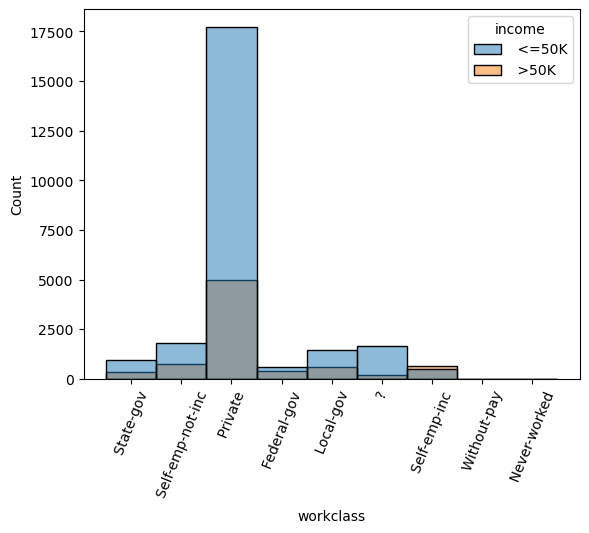

In [21]:
plt.xticks(rotation=68)
sns.histplot(data=data, x="workclass", hue="income",stat='count')
plt.show()

https://datascience.stackexchange.com/questions/89692/plot-two-categorical-variables

#### Output column

In [22]:
(data['income'].value_counts()/data.shape[0])*100

 <=50K    75.919044
 >50K     24.080956
Name: income, dtype: float64

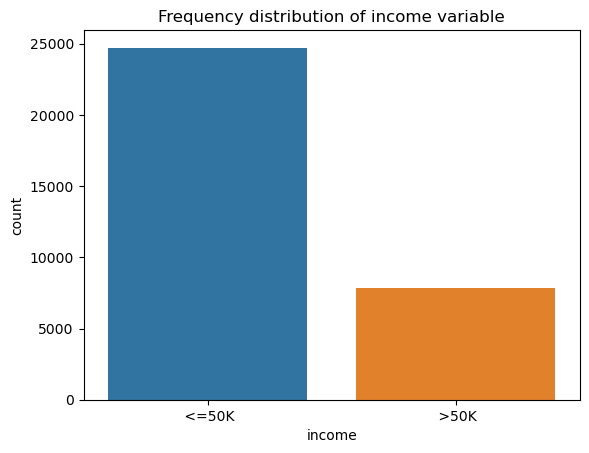

In [23]:
plt.title('Frequency distribution of income variable' ,fontsize=12)
sns.countplot(data=data,x='income')
plt.show()

### Percentage of frequency distribution of values

##### 1. income vs sex :

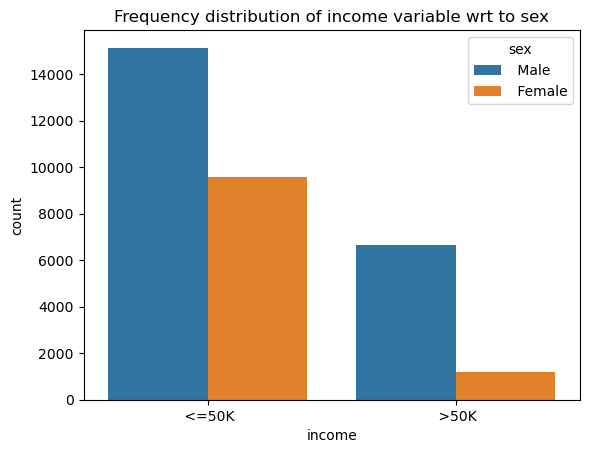

In [24]:
plt.title('Frequency distribution of income variable wrt to sex' ,fontsize=12)
sns.countplot(data=data,x='income',hue='sex')
plt.show()

##### 2. race vs income

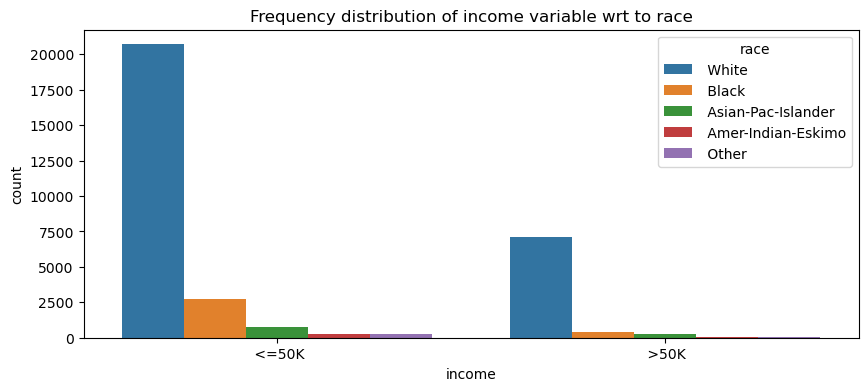

In [25]:
plt.figure(figsize=(10,4))
plt.title('Frequency distribution of income variable wrt to race' ,fontsize=12)
sns.countplot(data=data,x='income',hue='race')
plt.show()

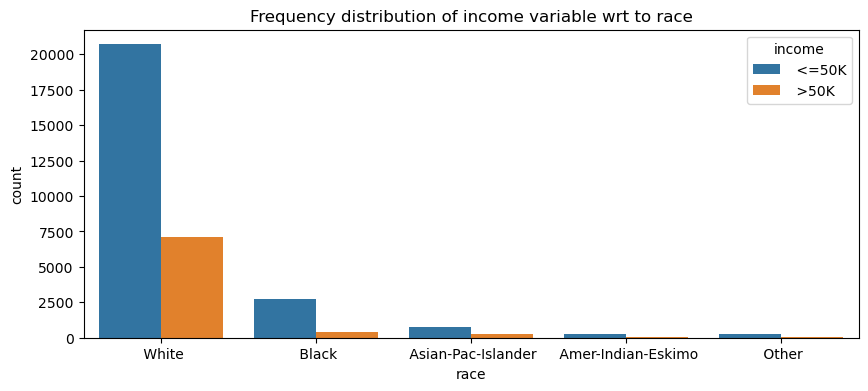

In [26]:
plt.figure(figsize=(10,4))
plt.title('Frequency distribution of income variable wrt to race' ,fontsize=12)
sns.countplot(data=data,x='race',hue='income')
plt.show()

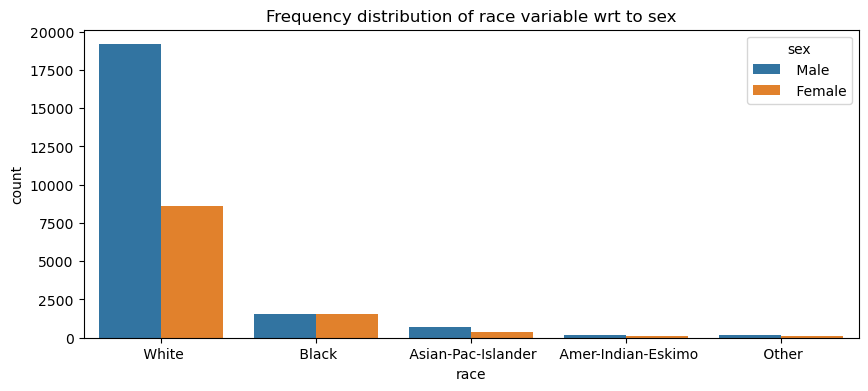

In [27]:
plt.figure(figsize=(10,4))
plt.title('Frequency distribution of race variable wrt to sex' ,fontsize=12)
sns.countplot(data=data,x='race',hue='sex')
plt.show()

##### Work class column distribution

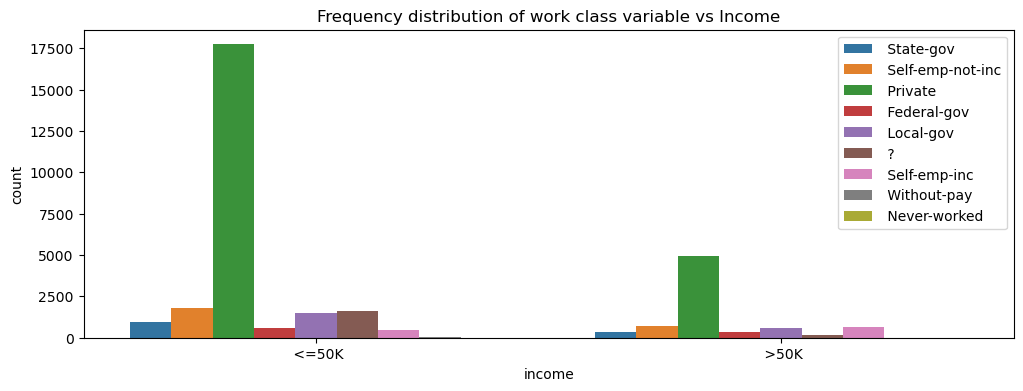

In [28]:

plt.figure(figsize=(12,4))
plt.title('Frequency distribution of work class variable vs Income' ,fontsize=12)
sns.countplot(data=data,x='income',hue='workclass')
plt.legend(loc=1)
plt.show()

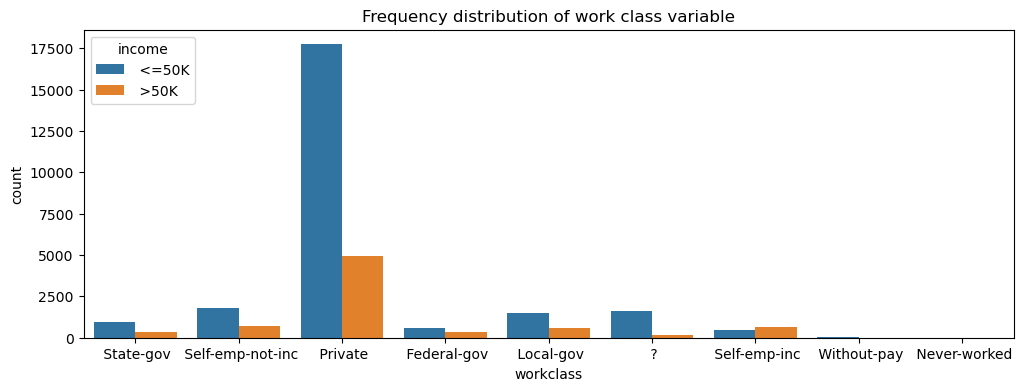

In [29]:

plt.figure(figsize=(12,4))
plt.title('Frequency distribution of work class variable' ,fontsize=12)
sns.countplot(data=data,x='workclass',hue='income')
plt.show()

### Numerical columns EDA

In [30]:
for i in data.columns:
    if data[i].dtype == 'int64':
        print(i)

age
fnlwgt
capital_gain
capital_loss
hours_per_week


[Text(0.5, 1.0, 'Distribution of age variable')]

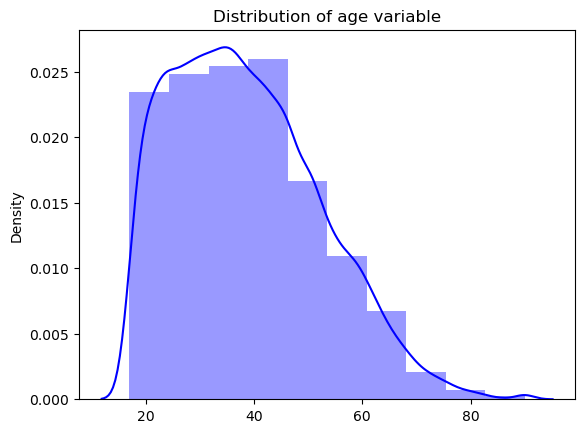

In [31]:
sns.distplot( x = data['age'],bins=10,color='blue',kde=True).set(title='Distribution of age variable')

<AxesSubplot:xlabel='age'>

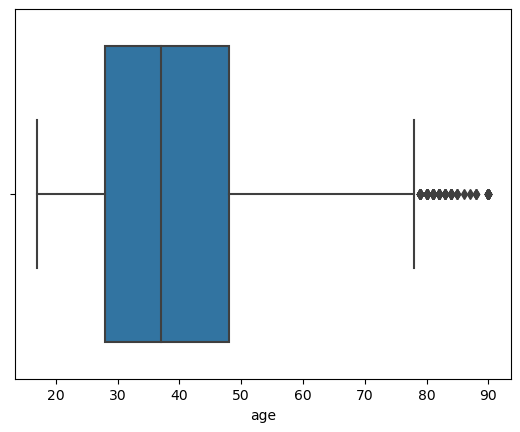

In [32]:
sns.boxplot(data=data,x='age')

##### age column has outliers

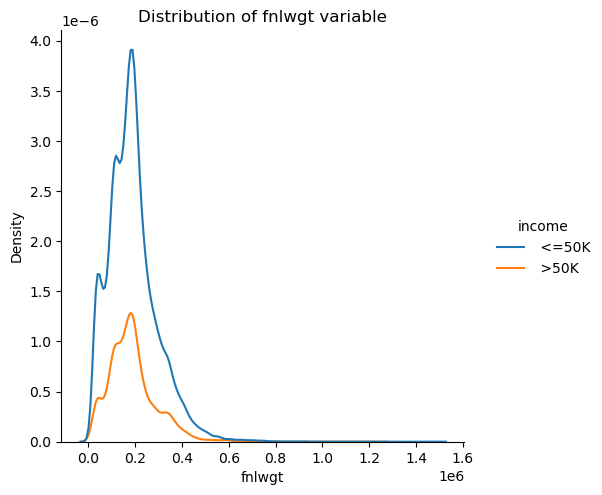

In [33]:
sns.displot(data=data, x = 'fnlwgt', hue='income',color='blue',kind="kde").set(title='Distribution of fnlwgt variable')

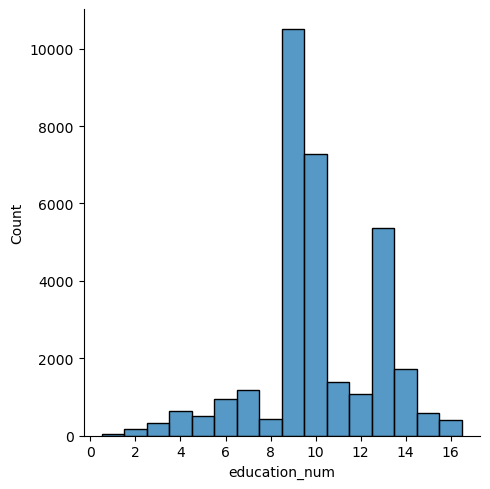

In [34]:
sns.displot(data=data,x='education_num',bins=20)

##### income vs age

<AxesSubplot:xlabel='income', ylabel='age'>

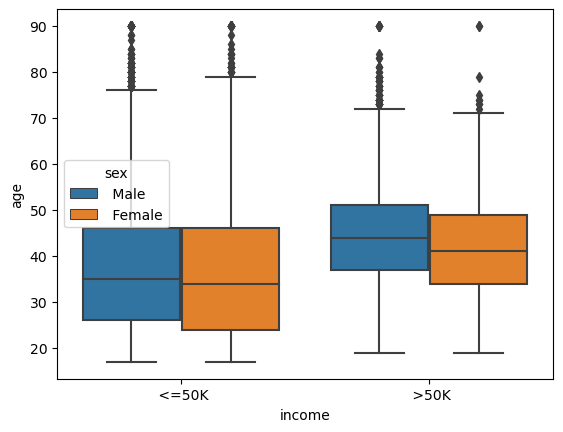

In [35]:
sns.boxplot(data=data,x='income',y='age',hue='sex')

<AxesSubplot:xlabel='workclass', ylabel='age'>

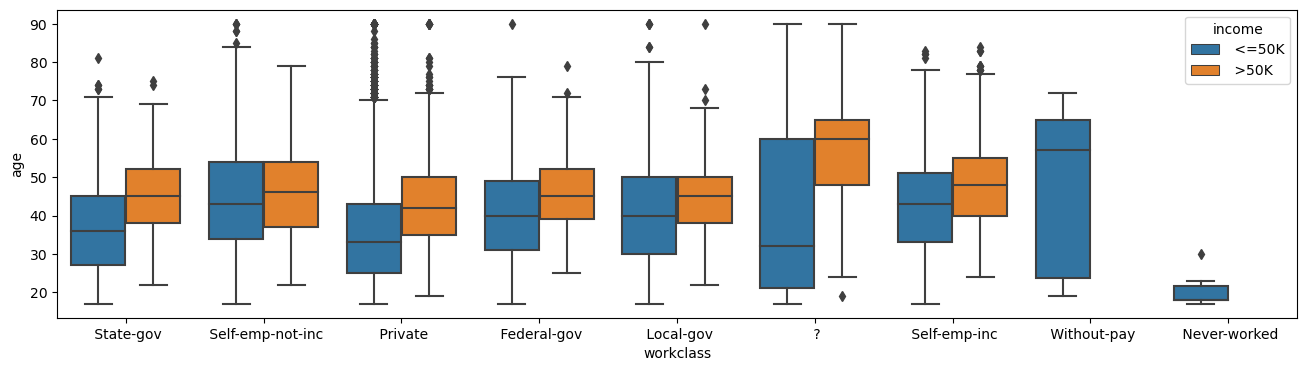

In [36]:
plt.figure(figsize=(16,4))
sns.boxplot(data=data,hue='income',y='age',x='workclass')

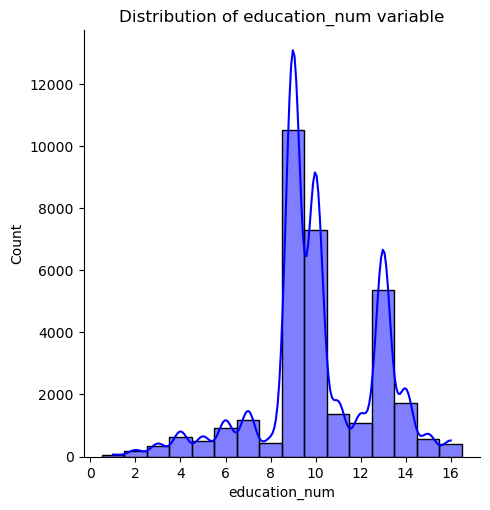

In [37]:
sns.displot( x = data['education_num'],bins=10,color='blue',kde=True).set(title='Distribution of education_num variable')
plt.show()

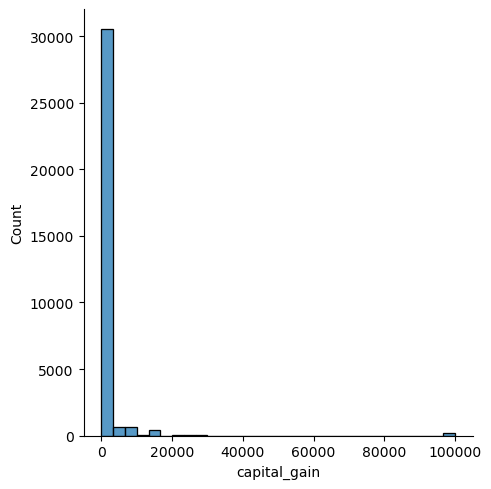

In [38]:
sns.displot(data=data,x='capital_gain',bins=30)

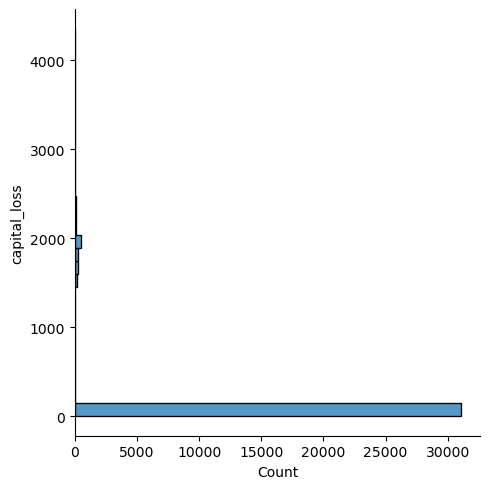

In [39]:
sns.displot(data=data,y='capital_loss',bins=30)

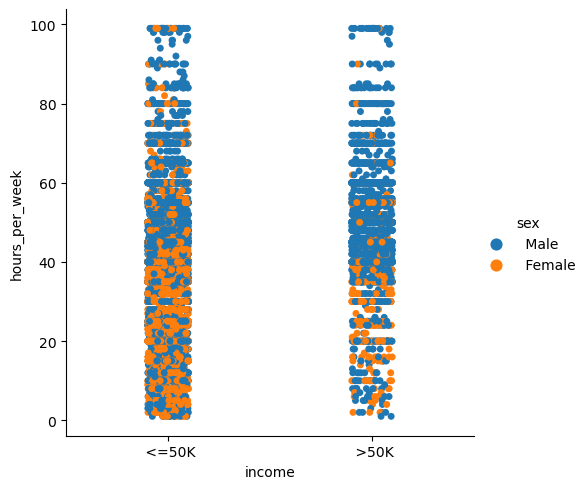

In [40]:
sns.catplot(data=data,y='hours_per_week',x='income',hue='sex')

<AxesSubplot:xlabel='income', ylabel='age'>

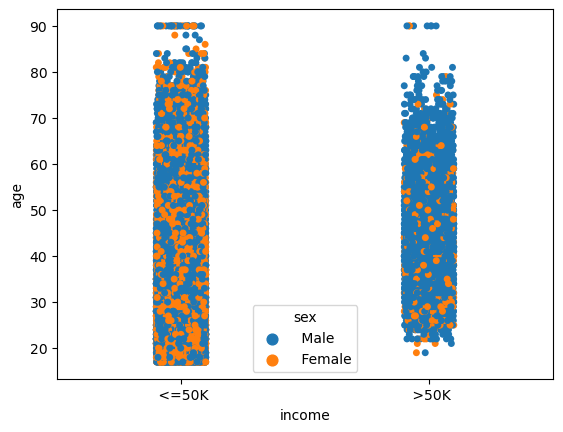

In [41]:
sns.stripplot(x='income',y='age',data=data, jitter=True, 
              hue='sex', dodge=False)

### correlation

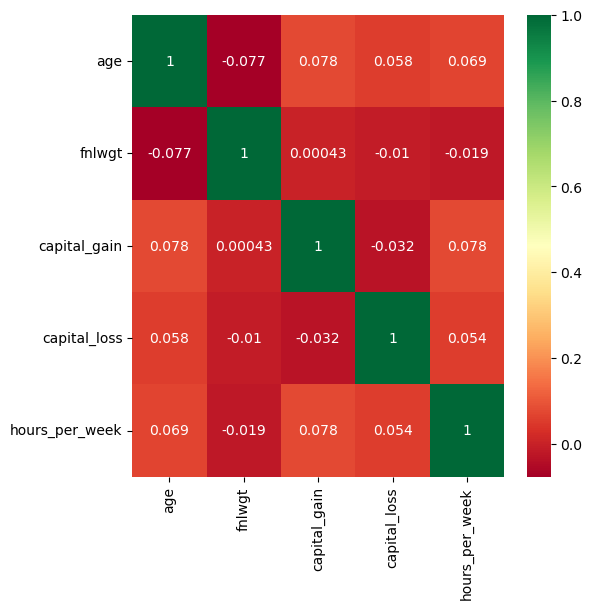

In [42]:
plt.figure(figsize=(6,6))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn') 

##### We can see that there is no strong correlation between variables.

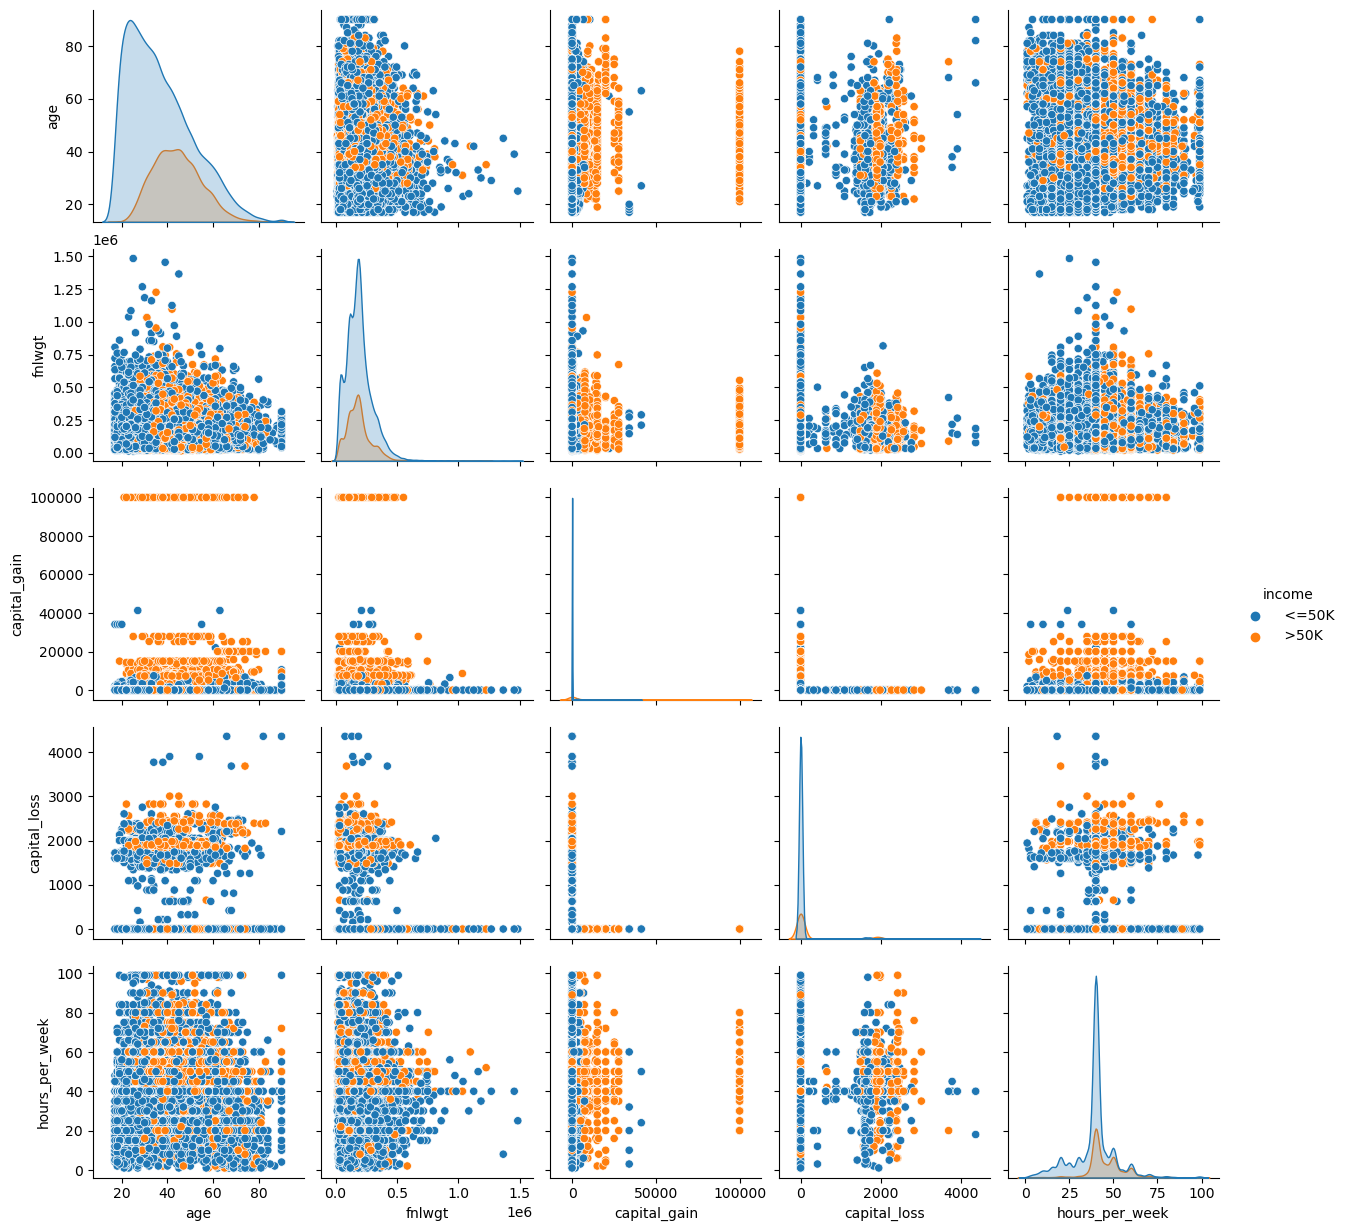

In [43]:
sns.pairplot(data,hue='income')

In [44]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X.shape, y.shape

((32561, 14), (32561,))

In [45]:
X.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [46]:
y.head

<bound method NDFrame.head of 0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: income, Length: 32561, dtype: object>

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

In [48]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

In [49]:
X_trf = pd.get_dummies(data=X, drop_first=True)
X_trf.head()

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
X_trf.columns

Index(['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week',
       'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc',
       ...
       'native_country_ Portugal', 'native_country_ Puerto-Rico',
       'native_country_ Scotland', 'native_country_ South',
       'native_country_ Taiwan', 'native_country_ Thailand',
       'native_country_ Trinadad&Tobago', 'native_country_ United-States',
       'native_country_ Vietnam', 'native_country_ Yugoslavia'],
      dtype='object', length=114)

In [51]:
le = LabelEncoder()
y_trf = le.fit_transform(y)
y_trf = pd.DataFrame(y_trf)

In [52]:
y_trf.shape

(32561, 1)

In [53]:
kfold = StratifiedKFold(n_splits=10, shuffle=False)

In [54]:
np.mean(cross_val_score(RandomForestClassifier(),X_trf, y_trf, cv=kfold, n_jobs=-1))

0.8532603939803817

##### oob score

In [55]:
rfc = RandomForestClassifier(random_state=0,oob_score=True)

In [56]:
rfc.fit(X_trf,y_trf)

RandomForestClassifier(oob_score=True, random_state=0)

In [57]:
rfc.oob_score_

0.8527379380240164

##### data splitting

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_trf,y_trf,test_size=0.3,random_state=0,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22792, 114), (9769, 114), (22792, 1), (9769, 1))

In [59]:
rfc = RandomForestClassifier(random_state=0,n_jobs=-1)

In [60]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [61]:
y_pred = rfc.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
accuracy_score(y_test,y_pred)

0.8531067663015662

In [63]:
print("training score: ",accuracy_score(y_train,rfc.predict(X_train)))
print()
print("test score: ",accuracy_score(y_test,y_pred))

training score:  0.9999122499122499

test score:  0.8531067663015662


In [64]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

### Find important features with Random Forest model 

In [65]:
feature_imp_df = pd.DataFrame()

In [66]:
feature_imp_df['feature_importance']= rfc.feature_importances_


In [67]:
feature_imp_df['feature_name'] = X_trf.columns 

In [68]:
feature_imp_df.sort_values(by='feature_importance',axis='rows',ascending=False,inplace=True)

In [69]:
feature_imp_df

,feature_importance,feature_name
1,0.156594,fnlwgt
0,0.150076,age
2,0.097776,capital_gain
44,0.086147,marital_status_ Married-civ-spouse
4,0.084532,hours_per_week
...,...,...
88,0.000017,native_country_ Honduras
50,0.000010,occupation_ Armed-Forces
100,0.000008,native_country_ Outlying-US(Guam-USVI-etc)
7,0.000008,workclass_ Never-worked


<AxesSubplot:xlabel='feature_importance', ylabel='feature_name'>

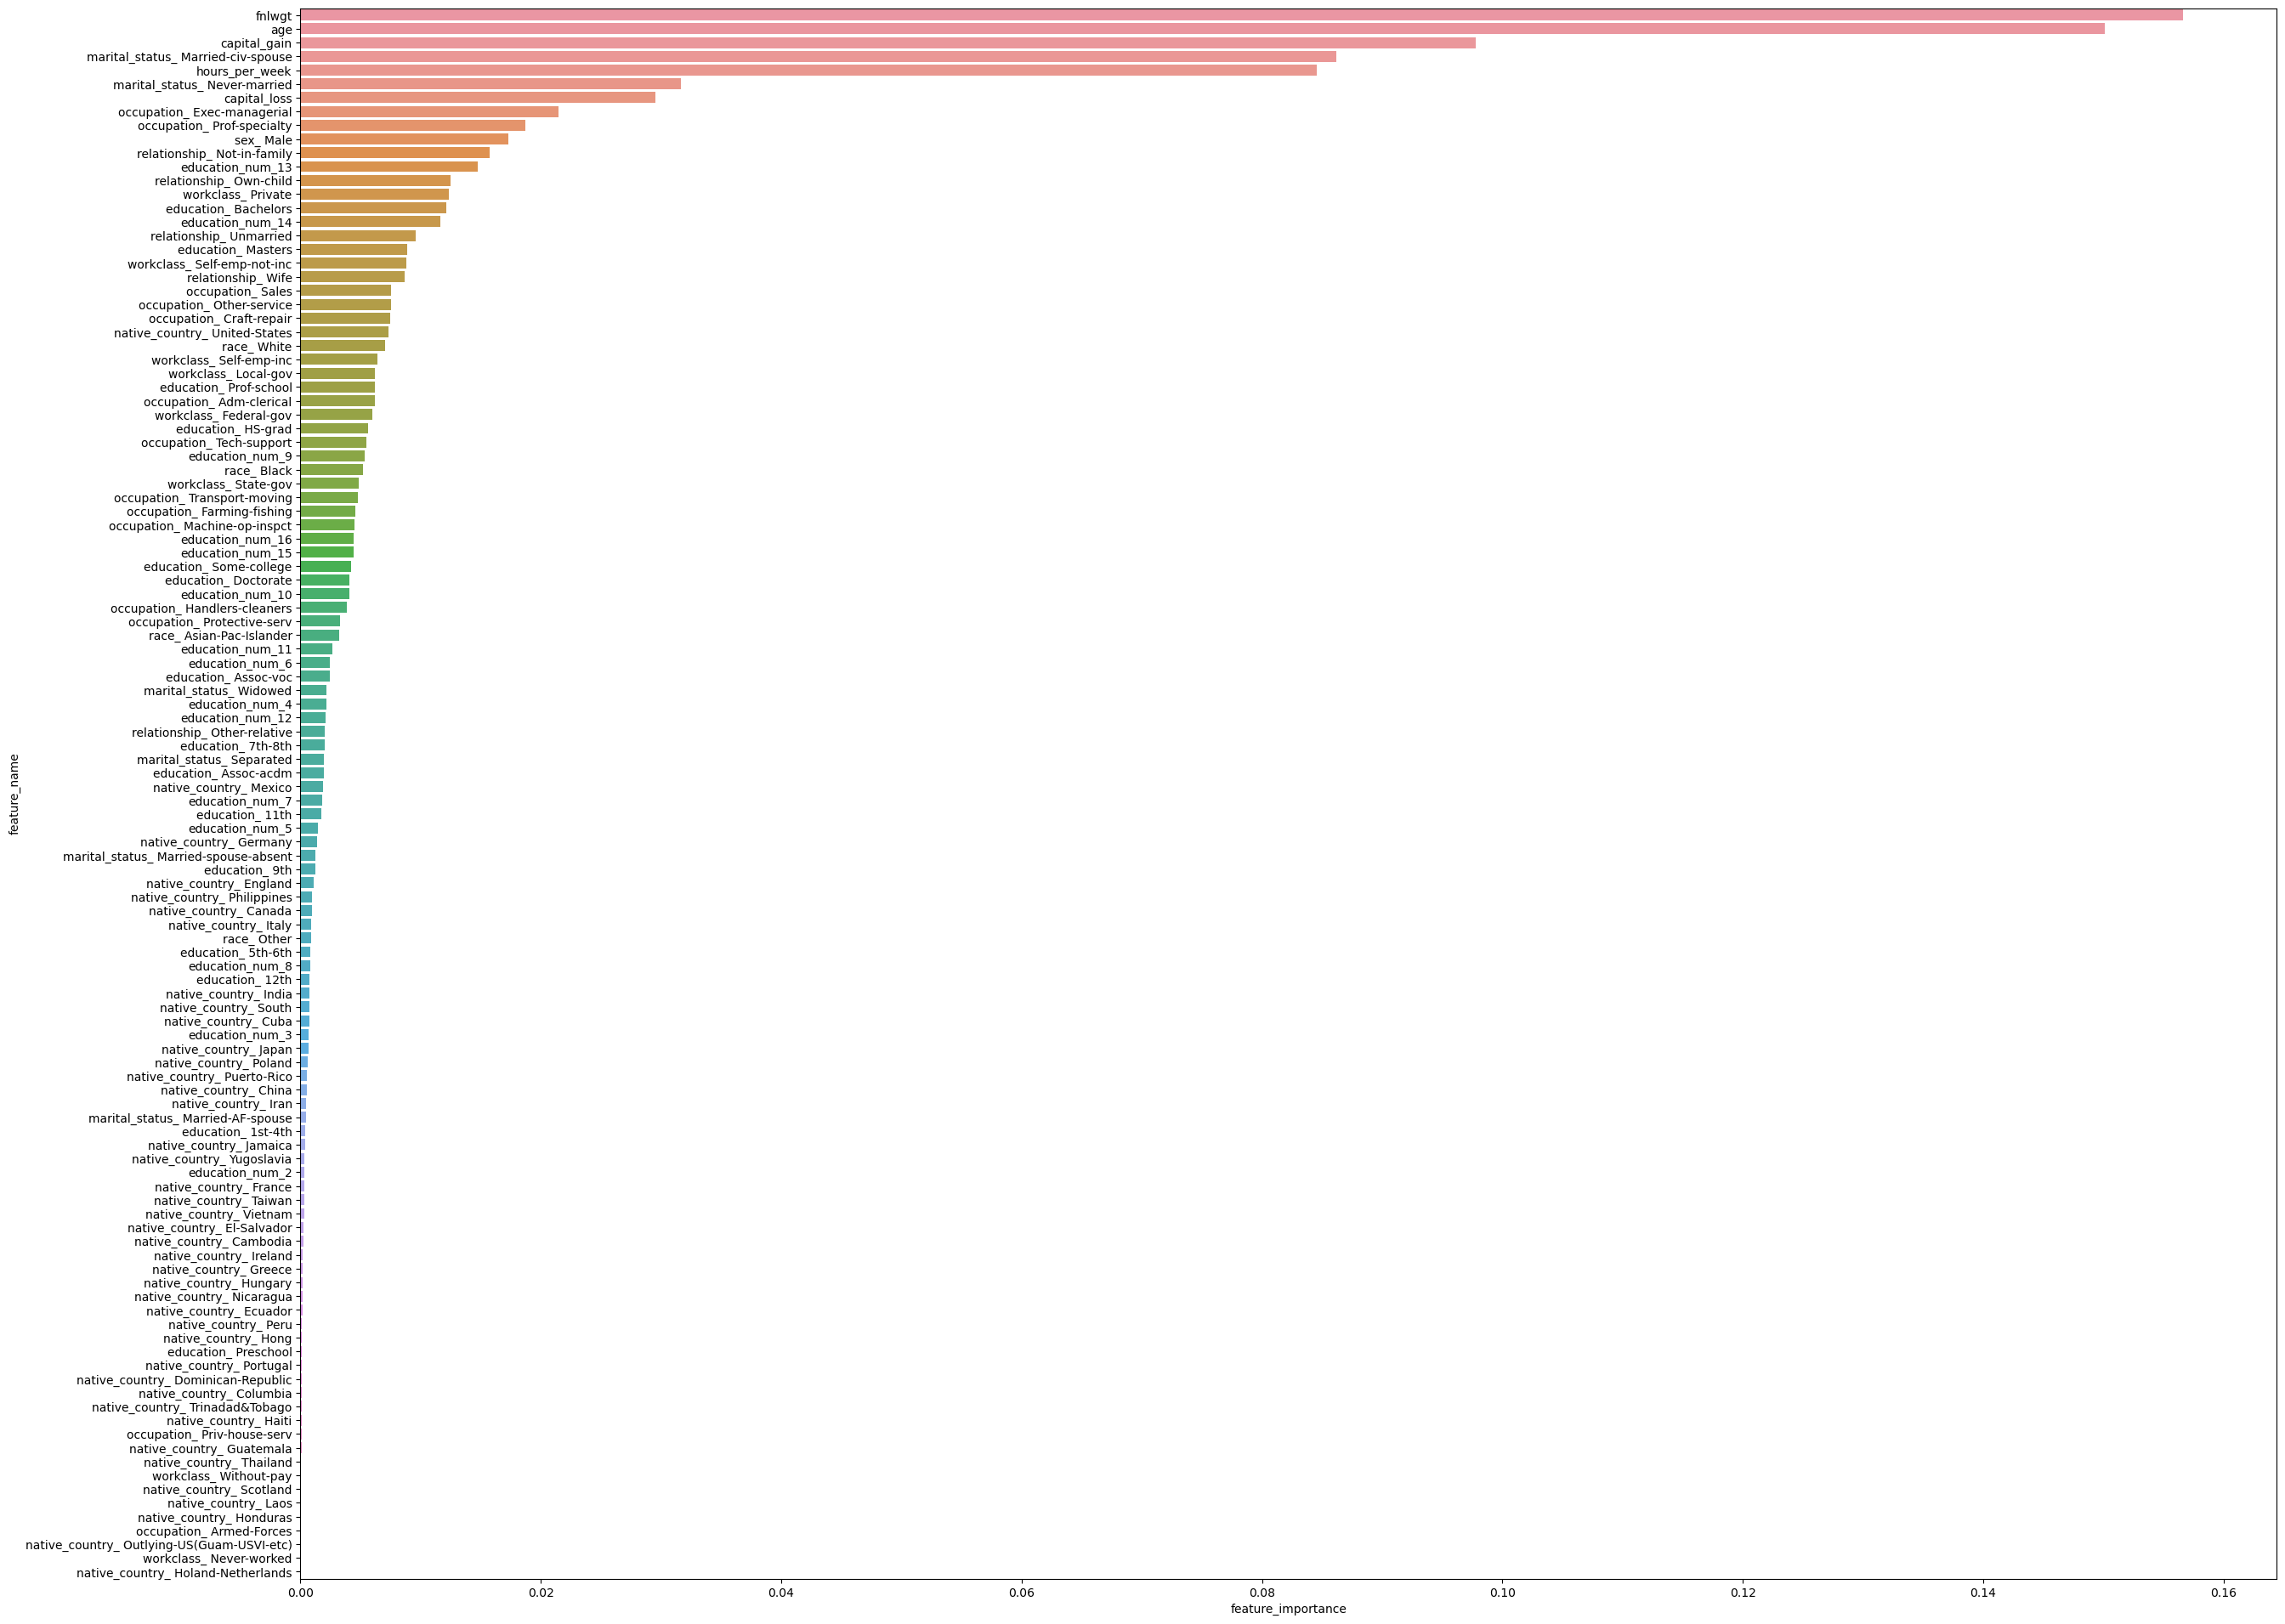

In [70]:
plt.subplots(figsize=(30, 24))
sns.barplot(data=feature_imp_df,x='feature_importance',y='feature_name')

<AxesSubplot:>

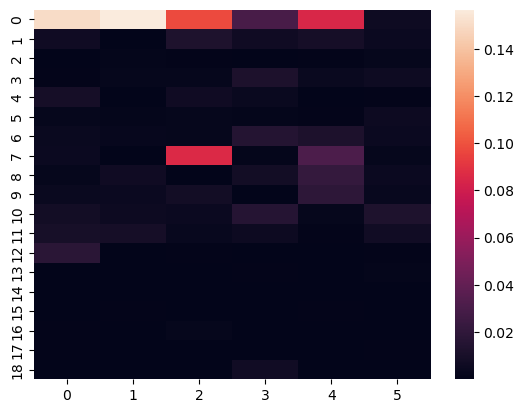

In [71]:
sns.heatmap(rfc.feature_importances_.reshape(19,6))

In [72]:
from sklearn.inspection import permutation_importance

In [73]:
results_feature = permutation_importance(rfc, X_train, y_train,  n_repeats=5,n_jobs=-1)

In [74]:
results_feature_df = pd.DataFrame()

In [101]:
pd.DataFrame(results_feature.importances_mean)

,0
0,0.098140
1,0.065795
2,0.047938
3,0.013698
4,0.073061
...,...
109,0.000000
110,0.000044
111,0.006028
112,0.000044


In [76]:
results_feature_df['feature_name'] = X_train.columns
results_feature_df['importance'] = results_feature.importances_mean


In [77]:
results_feature_df.sort_values(by='importance',ascending=False,inplace=True)
results_feature_df

,feature_name,importance
0,age,0.098140
44,marital_status_ Married-civ-spouse,0.085934
4,hours_per_week,0.073061
1,fnlwgt,0.065795
2,capital_gain,0.047938
...,...,...
50,occupation_ Armed-Forces,0.000000
100,native_country_ Outlying-US(Guam-USVI-etc),0.000000
99,native_country_ Nicaragua,0.000000
25,education_ Preschool,0.000000


In [78]:
results_feature_df[results_feature_df['importance'] >0].shape

(96, 2)

In [79]:
important_col = []
results_feature_df[results_feature_df['importance'] >0].iloc[:,0]

0                                     age
44     marital_status_ Married-civ-spouse
4                          hours_per_week
1                                  fnlwgt
2                            capital_gain
                      ...                
82                 native_country_ France
76               native_country_ Columbia
112               native_country_ Vietnam
101                  native_country_ Peru
57            occupation_ Priv-house-serv
Name: feature_name, Length: 96, dtype: object

In [80]:
for i in results_feature_df[results_feature_df['importance'] >0].iloc[:,0]:
    important_col.append(i)

In [81]:
important_col

['age',
 'marital_status_ Married-civ-spouse',
 'hours_per_week',
 'fnlwgt',
 'capital_gain',
 'occupation_ Exec-managerial',
 'marital_status_ Never-married',
 'sex_ Male',
 'occupation_ Prof-specialty',
 'workclass_ Private',
 'relationship_ Not-in-family',
 'capital_loss',
 'occupation_ Craft-repair',
 'education_num_13',
 'education_num_9',
 'occupation_ Other-service',
 'occupation_ Sales',
 'workclass_ Self-emp-not-inc',
 'education_ HS-grad',
 'education_ Bachelors',
 'relationship_ Wife',
 'relationship_ Own-child',
 'race_ White',
 'occupation_ Adm-clerical',
 'education_ Some-college',
 'native_country_ United-States',
 'relationship_ Unmarried',
 'occupation_ Transport-moving',
 'occupation_ Machine-op-inspct',
 'education_num_10',
 'workclass_ Local-gov',
 'occupation_ Tech-support',
 'workclass_ Self-emp-inc',
 'workclass_ Federal-gov',
 'race_ Black',
 'education_num_14',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'workclass_ State-gov',
 'educatio

<AxesSubplot:xlabel='importance', ylabel='feature_name'>

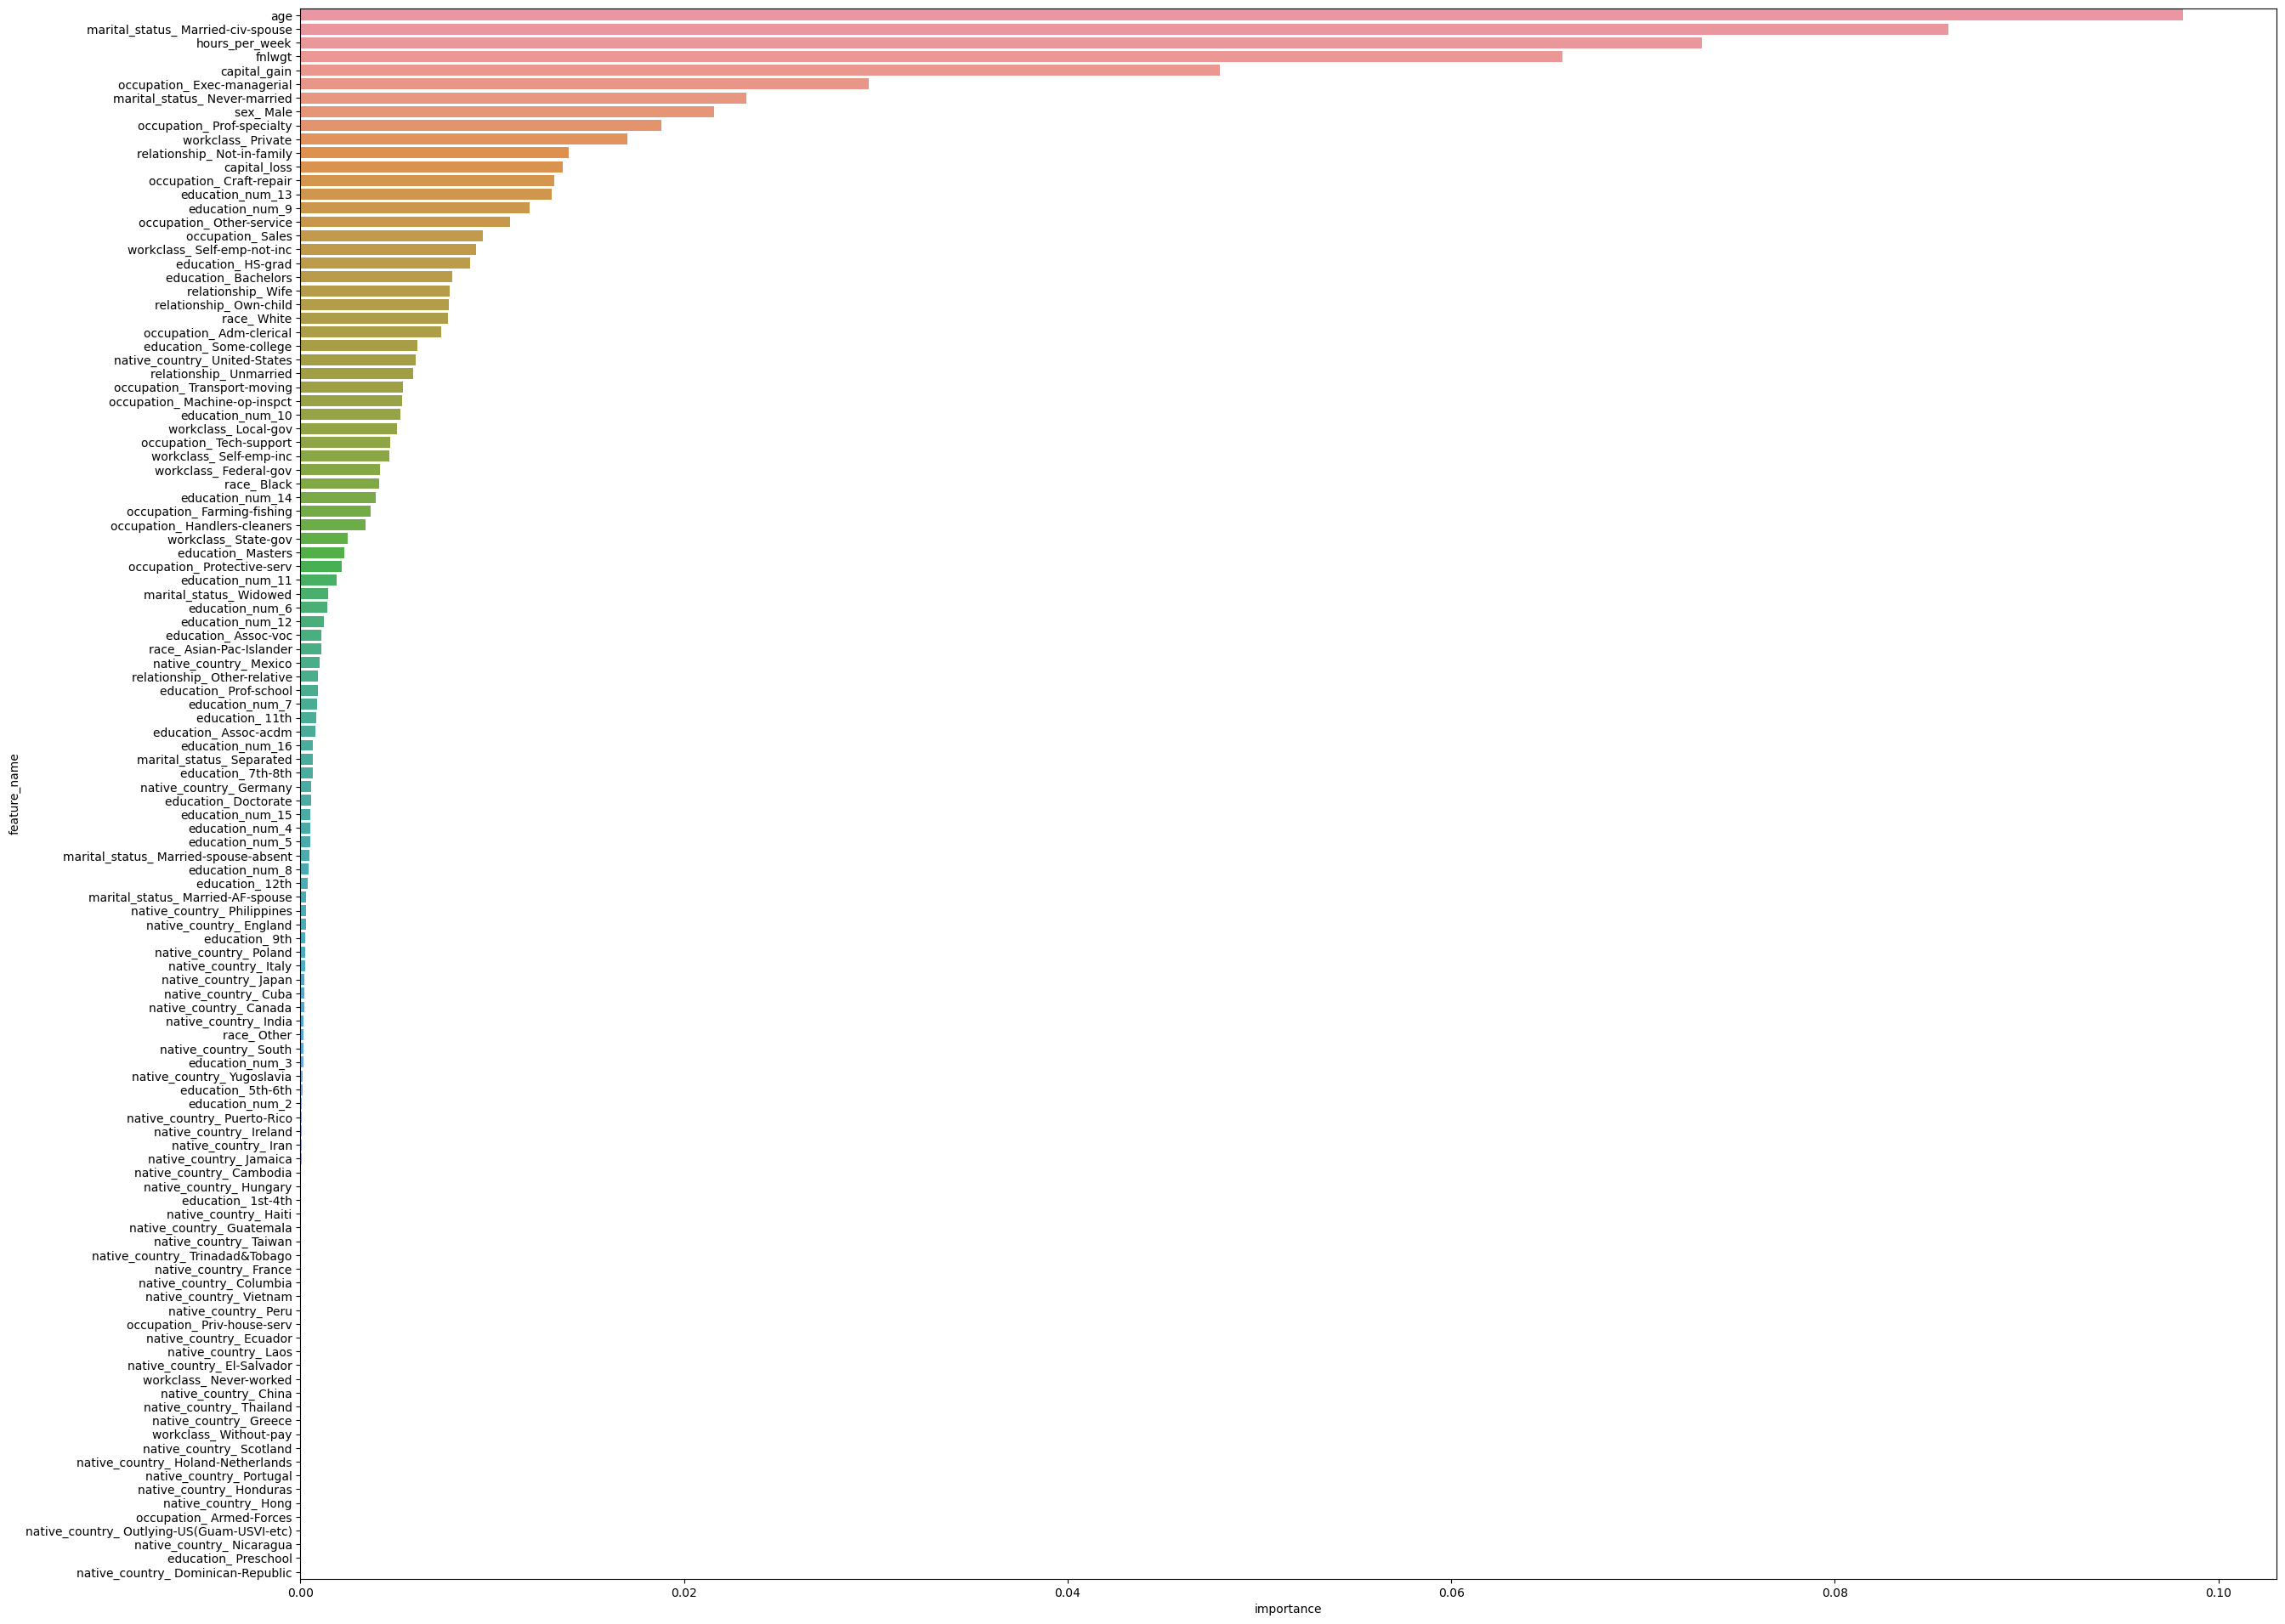

In [82]:
plt.subplots(figsize=(30, 24))
sns.barplot(data=results_feature_df,x='importance',y='feature_name')

### Hyper Parameter Tuning

Below is the list of the most important parameters and below that is a more refined section on how to improve prediction power and your model training phase easier. 

- __max_depth:__ The maximum depth of the tree - meaning the longest path between the root node and the leaf node.


- __min_sample_split:__ The minimum number of samples required to split an internal node:where the default = 2


- __max_leaf_nodes:__ This is the maximum number of leaf nodes a decision tree can have..


- __min_samples_leaf:__ This is the minimum number of samples required to be at a leaf node where the default = 1


- __n_estimators:__ This is the number of trees in the forest.


- __max_sample:__ This determines the fraction of the original dataset that is given to any individual tree.


- __max_features:__ This is the number of features to consider when looking for the best split.


- __bootstrap:__ If this is set as False, the whole dataset is used to build each tree, but it is set as Default.


- __criterion:__ The function to measure the quality of a split

In [83]:
# Number of Trees in Random forest
n_estimators = [80,100,120,160]

# number of features/columns to be considered at every split
max_features = ['auto', 'sqrt', 'log2',None]

# maximum number of levels in a tree
max_depth = [5,8,12,None] # None here means full grown Decision tree

# Max number of samples/rows
max_samples = [0.5,0.75,0.8,0.9,1]

# Minimum number of samples required to split a node
min_samples_split = [10,20,30]

# Minimum number of samples required to split each leaf node
min_samples_leaf = [1,2]


ccp_alphas = np.arange(0, 1, 0.05, dtype=float)

In [84]:
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'max_samples': max_samples,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'ccp_alpha' : ccp_alphas
             }

print(param_grid)

{'n_estimators': [80, 100, 120, 160], 'max_features': ['auto', 'sqrt', 'log2', None], 'max_depth': [5, 8, 12, None], 'max_samples': [0.5, 0.75, 0.8, 0.9, 1], 'min_samples_split': [10, 20, 30], 'min_samples_leaf': [1, 2], 'ccp_alpha': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])}


In [85]:
import time

In [86]:
rfc = RandomForestClassifier()

In [87]:
rf_grid = RandomizedSearchCV(estimator = rfc,
                             param_distributions = param_grid,
                             cv = 10,
                             n_iter = 20,
                             verbose = 2,
                             n_jobs= -1
                            )

In [88]:
start = time.time()

rf_grid.fit(X_trf,y_trf)

stop = time.time()
print(f"Training time: {stop - start} seconds")

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Training time: 422.47164702415466 seconds


In [89]:
rf_grid.best_params_

{'n_estimators': 80,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_samples': 1,
 'max_features': 'auto',
 'max_depth': 8,
 'ccp_alpha': 0.9500000000000001}

In [90]:
rf_grid.best_score_

0.7591904489970196

##### These values came from Hyperparameter tuning from kaggle

In [91]:
rfc = RandomForestClassifier(max_depth = 12,
                             max_samples = 0.8,
                             max_features='auto',
                             min_samples_leaf= 10,
                             min_samples_split= 20,
                             n_estimators= 160,
                             random_state=0)

In [92]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=12, max_samples=0.8, min_samples_leaf=10,
                       min_samples_split=20, n_estimators=160, random_state=0)

In [93]:
len(rfc.feature_names_in_)

114

In [94]:
rfc.feature_importances_

array([6.21122059e-02, 7.29000387e-03, 1.52107556e-01, 3.32919902e-02,
       4.95600053e-02, 2.59521970e-03, 8.89410974e-04, 0.00000000e+00,
       1.79150727e-03, 5.32465349e-03, 1.82097410e-03, 4.24525193e-04,
       0.00000000e+00, 1.51953200e-03, 1.01839189e-04, 2.22664998e-05,
       7.72605662e-04, 2.29935925e-03, 1.10217674e-03, 1.94755117e-04,
       5.68094285e-04, 2.88574916e-02, 7.37606572e-03, 9.80543385e-03,
       2.43766425e-02, 1.40457575e-05, 1.21220771e-02, 2.36314688e-03,
       1.02982547e-04, 4.83440575e-04, 2.60742992e-03, 1.27641530e-03,
       1.64814494e-03, 1.93610874e-03, 7.79702984e-05, 7.59974107e-03,
       2.22777872e-03, 5.35639988e-04, 2.83013072e-04, 2.82098258e-02,
       2.11092488e-02, 1.07042306e-02, 8.33187489e-03, 4.81597390e-06,
       1.98512523e-01, 2.77895998e-04, 7.52465377e-02, 1.38665599e-03,
       9.48183244e-04, 1.73550223e-03, 0.00000000e+00, 1.68736350e-03,
       3.96879766e-02, 2.90355475e-03, 2.72082572e-03, 9.43365400e-04,
      

In [95]:
y_pred = rfc.predict(X_test)

In [96]:
accuracy_score(y_test,y_pred)

0.8521854846964889

In [97]:
accuracy_score(y_train,rfc.predict(X_train))

0.8593366093366094

##### very good accuracy score for training and testing

In [98]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[7104,  313],
       [1131, 1221]], dtype=int64)

<AxesSubplot:>

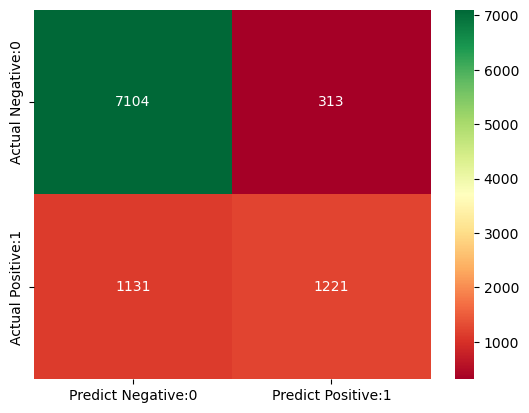

In [99]:
cm = pd.DataFrame(data=cm,columns=['Predict Negative:0','Predict Positive:1'],
                 index=['Actual Negative:0','Actual Positive:1'])

sns.heatmap(cm, annot=True, cmap ='RdYlGn',fmt='d')

In [100]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      7417
           1       0.80      0.52      0.63      2352

    accuracy                           0.85      9769
   macro avg       0.83      0.74      0.77      9769
weighted avg       0.85      0.85      0.84      9769

